# EDA

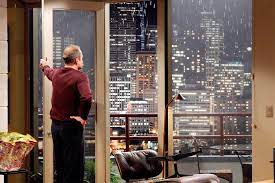

In [3]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [4]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

#read the database string from the .env
load_dotenv()

DB_STRING = os.getenv('DB_STRING')

db = create_engine(DB_STRING)

In [5]:
#import the data to a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_sales"
sales_sqlalchemy = pd.read_sql(query_string, db)

In [6]:
sales_sqlalchemy.head()

,date,price,house_id,id
0,2014-10-13,221900.000,7129300520,1
1,2014-12-09,538000.000,6414100192,2
2,2015-02-25,180000.000,5631500400,3
3,2014-12-09,604000.000,2487200875,4
4,2015-02-18,510000.000,1954400510,5


In [7]:
#import the data to a pandas dataframe
query_string = "SELECT * FROM eda.king_county_house_details"
details_sqlalchemy = pd.read_sql(query_string, db)

In [8]:
details_sqlalchemy.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1000102,6.000,3.000,2400.000,9373.000,2.000,NaN,0.000,3,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,100100050,3.000,1.000,1320.000,11090.000,1.000,0.000,0.000,3,7,1320.000,0.000,1955,0.000,98155,47.775,-122.304,1320.000,8319.000
2,1001200035,3.000,1.000,1350.000,7973.000,1.500,NaN,0.000,3,7,1350.000,0.000,1954,0.000,98188,47.432,-122.292,1310.000,7491.000
3,1001200050,4.000,1.500,1260.000,7248.000,1.500,NaN,0.000,5,7,1260.000,0.000,1955,NaN,98188,47.433,-122.292,1300.000,7732.000
4,1003000175,3.000,1.000,980.000,7606.000,1.000,0.000,0.000,3,7,980.000,0.000,1954,0.000,98188,47.436,-122.290,980.000,8125.000
5,100300280,3.000,2.250,1430.000,4777.000,2.000,0.000,0.000,3,7,1430.000,0.000,2010,0.000,98059,47.487,-122.152,1639.000,3854.000
6,100300500,3.000,2.500,1520.000,3041.000,2.000,0.000,0.000,3,7,1520.000,0.000,2009,NaN,98059,47.487,-122.152,1820.000,3229.000
7,100300530,3.000,2.500,1520.000,3003.000,2.000,0.000,0.000,3,7,1520.000,0.000,2009,0.000,98059,47.488,-122.153,1820.000,3030.000
8,1003400155,3.000,1.000,1100.000,7657.000,1.000,0.000,0.000,3,7,1100.000,0.000,1955,0.000,98188,47.437,-122.285,1300.000,8000.000
9,1003400245,3.000,1.000,1130.000,9907.000,1.000,0.000,0.000,3,7,1130.000,0.000,1954,0.000,98188,47.436,-122.286,1320.000,9907.000


In [9]:
from sqlalchemy import text

# Your SQL query
query = text("""
SELECT
    kchd.*,
    kchs.date,
    kchs.price
FROM eda.king_county_house_details AS kchd
LEFT JOIN eda.king_county_house_sales AS kchs
    ON kchd.id = kchs.house_id
""")

# Execute and read into a Pandas DataFrame
df = pd.read_sql_query(query, db, parse_dates=["date"])

# Inspect the result
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17749 non-null  float64       
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [10]:
df.to_csv('data/eda_merged_2025-10-15.csv', index=False)

In [11]:
df.shape

(21597, 21)

In [16]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [13]:
df['date'].nsmallest()

172    2014-05-02
312    2014-05-02
502    2014-05-02
775    2014-05-02
1040   2014-05-02
Name: date, dtype: datetime64[ns]

In [14]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140


In [21]:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [15]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [19]:
import missingno as msno
df.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

Finding the ZIP codes for city center and countryside. First figure out how many and what kinds of different ZIP codes there are. (Answer: 70 zip codes + see below.) Google for the zip codes that are concidered Seattle center or the country side. Country zips correspond to nicer rural areas suitable for a vacation home.

In [25]:
df['zipcode'].nunique()
#df['zipcode'].value_counts()

70

In [31]:
central_zips = [98101, 98102, 98104, 98109, 98119, 98122, 98144, 98105]
#urban_zips_extended = central_zips + [
#    98103, 98107, 98115, 98116, 98117, 98118, 98125, 98126, 98133, 98136, 98146,
#    98004, 98005, 98006, 98007, 98008, 98033, 98034, 98039, 98040, 98052
#]
country_zips = [98010, 98014, 98024, 98045, 98051, 98065, 98068, 98072, 98077]

#df['area_type'] = df['zipcode'].apply(lambda x: 'country' if x in country_zips else 'city')


Central houses.
Since the client wants a house for two people, we only need houses with two bedrooms. This reduces the number of options to 274.

In [32]:
df_2bed_central = df[(df['bedrooms'] == 2) & (df['zipcode']).isin(central_zips)]
df_2bed_central.shape

(274, 21)

In [69]:
import plotly.express as px
df_2bed_central_map = (df_2bed_central.rename(columns={"latitude":"lat","longitude":"lon"})
                       .assign(zip_str=lambda d: d["zipcode"].astype(str)))

zip_order = sorted(df_2bed_central_map["zip_str"].unique())

palette = px.colors.qualitative.Set2

fig_map_center = px.scatter_map(
    df_2bed_central_map,
    lat="lat", 
    lon="long",
    color="zip_str",
    category_orders={"zip_str": zip_order},
    color_discrete_sequence=palette,
    hover_data=["price","zipcode"],
    zoom=9, 
    height=600,
    title="Houses by ZIP"
)
fig_map_center.update_layout(mapbox_style="open-street-map", margin=dict(l=0,r=0,t=40,b=0), legend_title_text="ZIP code")

fig_map_center

Now let's figure out the pricing.

In [40]:
df_2bed_central['price'].nunique()
df_2bed_central['price'].nsmallest(5)
df_2bed_central['price'].nlargest(10)

18061   1700000.000
19896   1260000.000
7421    1250000.000
218     1070000.000
20234   1050000.000
13015    998500.000
21301    935000.000
15148    930000.000
7189     900000.000
19464    885000.000
Name: price, dtype: float64

In [64]:
av_price_by_zip = df_2bed_central.groupby('zipcode')['price'].mean().reset_index().sort_values(by='zipcode')
av_price_by_zip.head(8)

,zipcode,price
0,98102,534684.783
1,98105,544411.561
2,98109,673645.000
3,98119,615175.000
4,98122,486638.062
5,98144,407804.262


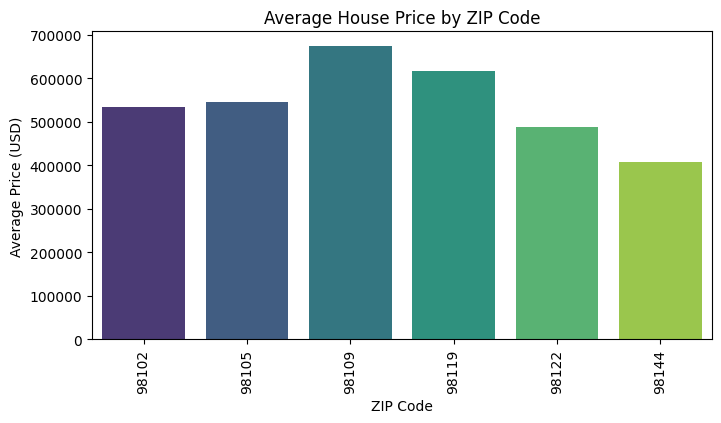

In [73]:
plt.figure(figsize=(8,4))
sns.barplot(data=av_price_by_zip, x="zipcode", y="price", palette="viridis")
plt.title("Average House Price by ZIP Code")
plt.xlabel("ZIP Code")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


Apparently, some of the zip areas are more affluent than the others. What about the total distribution of prices?

In [35]:
df_2bed_central['price'].describe()

count       274.000
mean     508031.865
std      182264.717
min      181000.000
25%      387000.000
50%      460000.000
75%      595000.000
max     1700000.000
Name: price, dtype: float64

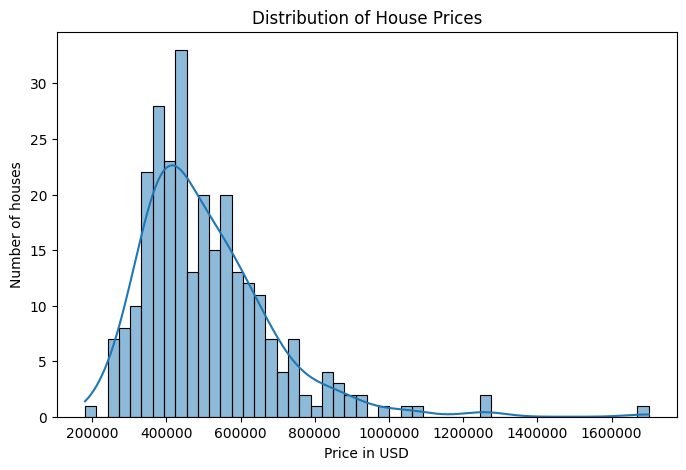

In [38]:
sns.histplot(df_2bed_central['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price in USD")
plt.ylabel("Number of houses")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Because the distribution is skewed, it would be reasonable to focus on the bulk of the houses, prices for which lay between approximately 250000 and 800000 USD. Let's separate them into price categories and see what each of them has to offer. The categories are based on the largest and smallest prices (the extremes were removed) and the quartiles from the descriptive statistics above. 

In [82]:
bins = [245000, 390000, 460000, 595000, 800000]
labels = ['up to 390000', 'up to 460000', 'up to 595000', 'up to 800000']
df_2bed_central["price_category"] = pd.cut(df_2bed_central["price"], bins=bins, labels=labels, include_lowest=True)
df_2bed_central["price_category"].value_counts().sort_index()

price_category
up to 390000    74
up to 460000    63
up to 595000    69
up to 800000    50
Name: count, dtype: int64

In [86]:
df_2bed_central.groupby("price_category")[["sqft_living", "sqft_lot", "bathrooms", "floors", "condition", "grade"]].mean().round(1)

,sqft_living,sqft_lot,bathrooms,floors,condition,grade
price_category,,,,,,
up to 390000,991.900,2070.100,1.400,1.700,3.100,7.000
up to 460000,1119.900,2509.700,1.600,1.700,3.400,7.200
up to 595000,1291.200,2897.300,1.600,1.500,3.300,7.200
up to 800000,1459.400,3407.800,1.600,1.600,3.500,7.800


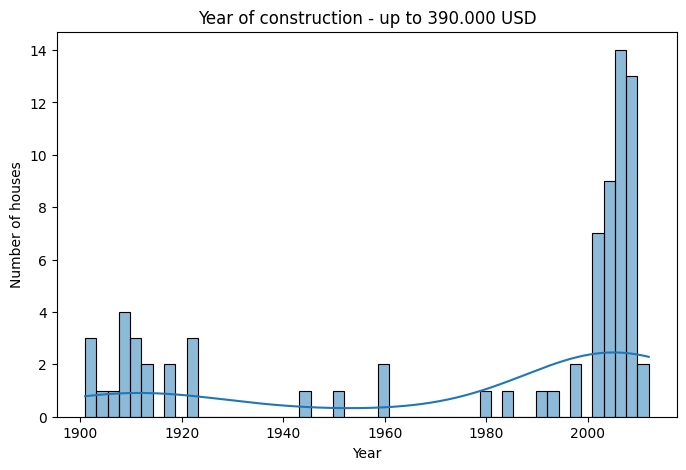

In [80]:
sns.histplot(df_2bed_central[df_2bed_central['price_category'] == 'up to 390000'], x='yr_built', bins=50, kde=True)
plt.title("Year of construction - up to 390.000 USD")
plt.xlabel("Year")
plt.ylabel("Number of houses")
plt.ticklabel_format(style='plain', axis='x')
plt.show()

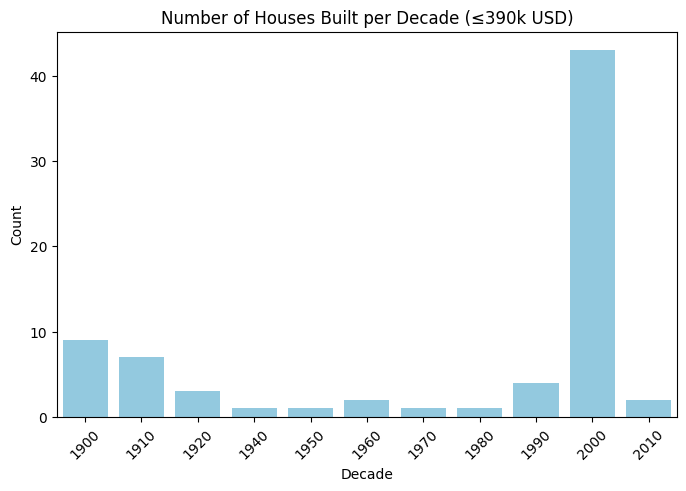

In [81]:
df_2bed_central["decade"] = (df_2bed_central["yr_built"] // 10) * 10

sns.countplot(
    data=df_2bed_central[df_2bed_central["price_category"] == "up to 390000"],
    x="decade",
    color="skyblue"
)
plt.title("Number of Houses Built per Decade (≤390k USD)")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

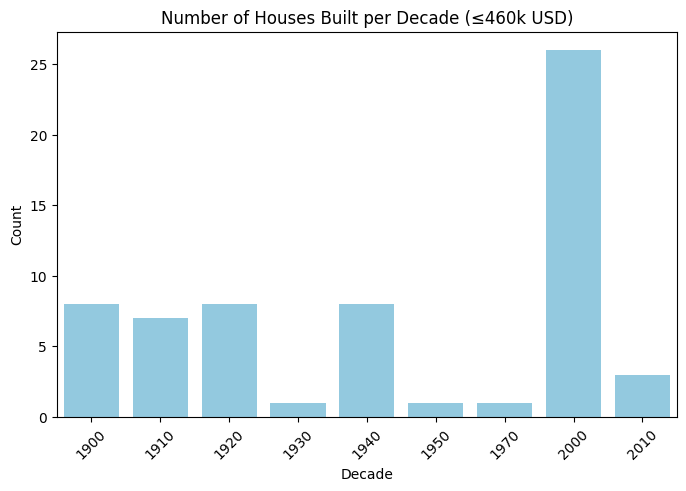

In [87]:
sns.countplot(
    data=df_2bed_central[df_2bed_central["price_category"] == "up to 460000"],
    x="decade",
    color="skyblue"
)
plt.title("Number of Houses Built per Decade (≤460k USD)")
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [88]:
df_2bed_central.groupby('price_category')['decade'].agg(pd.Series.mode)

price_category
up to 390000    2000
up to 460000    2000
up to 595000    2000
up to 800000    1920
Name: decade, dtype: int64

Placeholder: 1. map of the houses based on their coordinates, 2. what sort of houses there are. E.g. price in each zip code. Price vs living area. What you get in each price category (create).
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0